In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../../'))

import qiskit
provider = qiskit.IBMQ.load_account()


import numpy as np

from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import QAOA
from shared.QiskitMaxcut import *
from ibm.ibm_parameters import *
from matplotlib import pyplot as plt
%matplotlib inline


from ibm_landscape_processes import *

ibmqfactory.load_account:WARNING:2021-08-20 10:24:00,455: Credentials are already in use. The existing account in the session will be replaced.


In [2]:
%load_ext autoreload
%autoreload 2

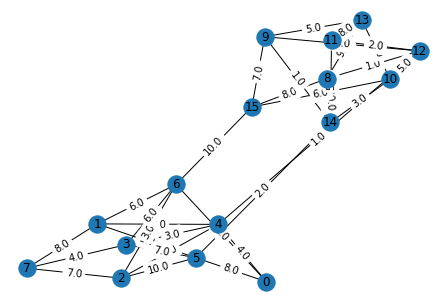

In [3]:
# ---- Define graph and MaxCut ----
graph = load_nx_graph_from("../data/graphs/16_nodes/graph_16_33_01_w.txt")
max_cut = Maxcut(graph)
max_cut_qubo = max_cut.to_qubo()
max_cut.draw()

In [4]:
step_size = 0.1
a_gamma = np.arange(0, np.pi, step_size)
b_beta = np.arange(0, np.pi, step_size)

In [5]:
a_gamma, b_beta = np.meshgrid(a_gamma, b_beta)

In [6]:
F1 = run_all(a_gamma, b_beta, max_cut)

Row 0
Row 1
Row 2
Row 3
Row 4
Row 5
Row 6
Row 7
Row 8
Row 9
Row 10
Row 11
Row 12
Row 14
Row 15
Row 16
Row 17
Row 18
Row 19
Row 20
Row 21
Row 22
Row 23
Row 24
Row 25
Row 26
Row 27
Row 28
Row 29
Row 30
Row 31


[[ -88.55149841  -88.52287292  -88.60437775 ...  -88.32862854
   -88.5059967   -88.56112671]
 [ -88.73387146  -77.07624817  -67.28612518 ... -113.19537354
  -104.32350159  -93.28375244]
 [ -88.50025177  -85.81950378  -84.19887543 ...  -94.05474854
   -92.10475159  -89.89350128]
 ...
 [ -88.73012543  -90.09899902  -90.92774963 ...  -86.00637817
   -86.65924835  -88.02562714]
 [ -88.54412842  -87.97037506  -87.43975067 ...  -89.39600372
   -89.63287354  -88.80962372]
 [ -88.69450378  -88.20825195  -87.94750214 ...  -89.27337646
   -88.74949646  -88.55562592]]


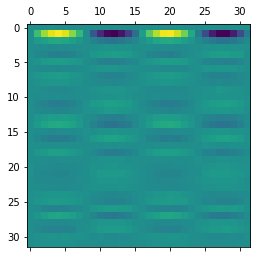

In [7]:
print(F1)
plt.matshow(F1)
plt.show()

In [8]:
np.mean(F1)

-88.5056446865201

In [9]:
F2 = F1 - np.mean(F1)

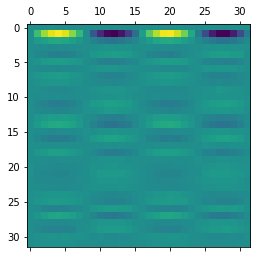

In [10]:
plt.matshow(F2)
plt.show()

In [11]:
F2

array([[-4.58537266e-02, -1.72282383e-02, -9.87330601e-02, ...,
         1.77016146e-01, -3.52017581e-04, -5.54820225e-02],
       [-2.28226773e-01,  1.14293965e+01,  2.12195195e+01, ...,
        -2.46897288e+01, -1.58178569e+01, -4.77810775e+00],
       [ 5.39291650e-03,  2.68614090e+00,  4.30676926e+00, ...,
        -5.54910385e+00, -3.59910690e+00, -1.38785660e+00],
       ...,
       [-2.24480741e-01, -1.59335434e+00, -2.42210495e+00, ...,
         2.49926651e+00,  1.84639633e+00,  4.80017550e-01],
       [-3.84837314e-02,  5.35269625e-01,  1.06589402e+00, ...,
        -8.90359037e-01, -1.12722885e+00, -3.03979032e-01],
       [-1.88859098e-01,  2.97392733e-01,  5.58142550e-01, ...,
        -7.67731778e-01, -2.43851773e-01, -4.99812290e-02]])

In [12]:
np.unravel_index(np.argmin(F1), F1.shape)

(1, 12)

In [13]:
np.min(F1)

-117.9853744506836

In [15]:
F1[1,12]

-117.9853744506836